In [5]:
import pandas as pd
import matplotlib.pyplot as mat
import seaborn as sb
from sklearn.cluster import DBSCAN

In [2]:
myDF = pd.read_csv("Mall_customers.csv")
myDF

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
myDF = myDF.rename(columns={"Annual Income (k$)":"Annual_Income","Spending Score (1-100)":"Spending_Score"})
myDF

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


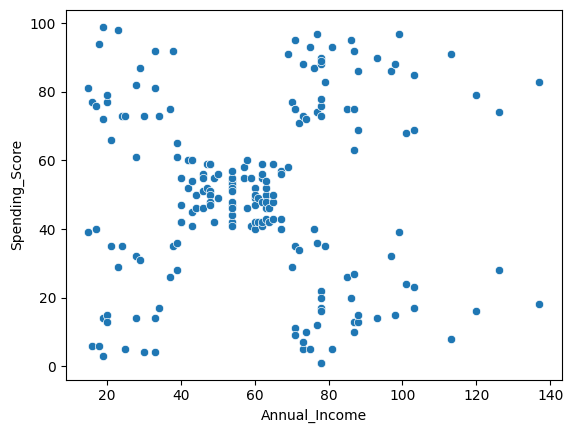

In [4]:
sb.scatterplot(data=myDF,x="Annual_Income",y="Spending_Score")
mat.show()

In [7]:
cluster_model = DBSCAN(eps=5,min_samples=5)
predicted_cluster = cluster_model.fit_predict(myDF[["Annual_Income","Spending_Score"]])
myDF["cluster_category"] = predicted_cluster
myDF

,CustomerID,Gender,Age,Annual_Income,Spending_Score,cluster_category
0,1,Male,19,15,39,-1
1,2,Male,21,15,81,0
2,3,Female,20,16,6,-1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,-1
...,...,...,...,...,...,...
195,196,Female,35,120,79,-1
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,-1


In [8]:
predicted_cluster

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1, -1,  2, -1,  4,  3,  2,  3,  2, -1,  2,  3,  4,
        3,  2,  3,  2,  3,  4, -1,  4,  3,  4, -1,  2, -1,  4, -1,  4, -1,
        2, -1,  4,  3,  2,  3,  2, -1,  4, -1,  4, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [9]:
# remove the -1 (outliers)
myDF = myDF[myDF["cluster_category"] != -1]
myDF

,CustomerID,Gender,Age,Annual_Income,Spending_Score,cluster_category
1,2,Male,21,15,81,0
3,4,Female,23,16,77,0
5,6,Female,22,17,76,0
9,10,Female,30,19,72,0
13,14,Female,24,20,77,0
...,...,...,...,...,...,...
157,158,Female,30,78,78,2
158,159,Male,34,78,1,3
159,160,Female,30,78,73,2
161,162,Female,29,79,83,4


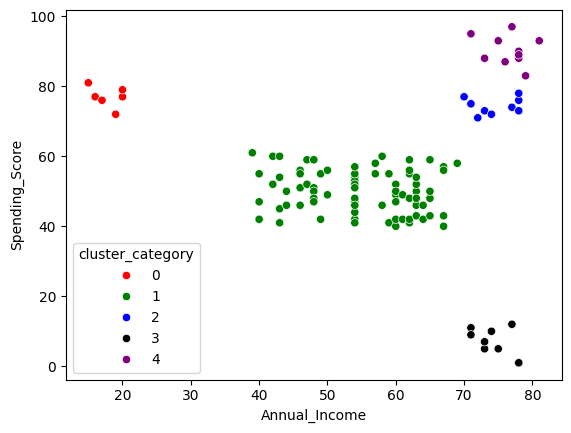

In [11]:
sb.scatterplot(data=myDF,x="Annual_Income",y="Spending_Score",hue="cluster_category",
               palette=["r","g","b","black","purple"])
mat.show()